<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Alphas/Retail_Crypto_Universe_Return_by_Ticker_Rank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

13:44:58 Starting...
13:44:58 Installing yfinance into Google notebook...
13:45:13 Installing arch into Google notebook...
13:45:27 Initialized.


In [31]:
data=pd.read_table('https://s3.amazonaws.com/public.gillerinvestments.com/crypto_returns.txt',header=[0, 1],skiprows=[2],sep='\\s+',engine='python',parse_dates=True)
data.columns=list(map(lambda x:x.replace("-USD",""),data.columns.droplevel(1)))
data.index=pd.DatetimeIndex(data.index).to_period('D')
data.index.name='UTC Date'
data.columns.name='Return (%)'
data=data[sorted(data.columns)].copy()
display(data)

Return (%),AAVE,ADA,ARB,AVAX,BCH,BONK,BTC,COMP,DOGE,ETC,...,PNUT,POPCAT,SHIB,SOL,TRUMP,UNI,WIF,XLM,XRP,XTZ
UTC Date,,,,,,,,,,,,,,,,,,,,,
2024-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-08,NaN,NaN,NaN,NaN,NaN,NaN,1.448534,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-09,NaN,NaN,NaN,NaN,NaN,NaN,2.348370,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-10,NaN,NaN,NaN,NaN,NaN,NaN,-0.402624,NaN,0.477437,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-11,NaN,NaN,NaN,NaN,2.013289,NaN,-0.655153,NaN,-1.226744,-1.542857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-19,6.443445,-2.295334,-0.762880,-3.389058,-3.282590,-4.154519,-0.764352,-4.829850,-3.724915,-0.944054,...,-2.975321,-9.171970,-2.830503,-3.682969,-2.749390,-3.154751,-6.883488,-2.010943,-1.993209,-3.281587
2025-05-20,5.026192,0.477961,0.433240,1.575605,0.326137,1.571610,1.162133,-0.429612,0.733036,-0.567034,...,-5.438056,3.969475,0.137080,1.077644,11.987591,1.558737,-1.797992,0.319066,-0.983279,1.492341
2025-05-21,-4.474391,3.188849,4.410855,2.602982,3.388736,2.869978,2.660638,2.612542,3.573144,3.118154,...,8.790959,7.635080,1.608487,2.978716,-0.030026,3.208246,14.572789,1.976163,1.653572,1.787471


14:03:17 Wrote figure to 'Cumulative Return for Retail Cryptocurrency Sample.png'.


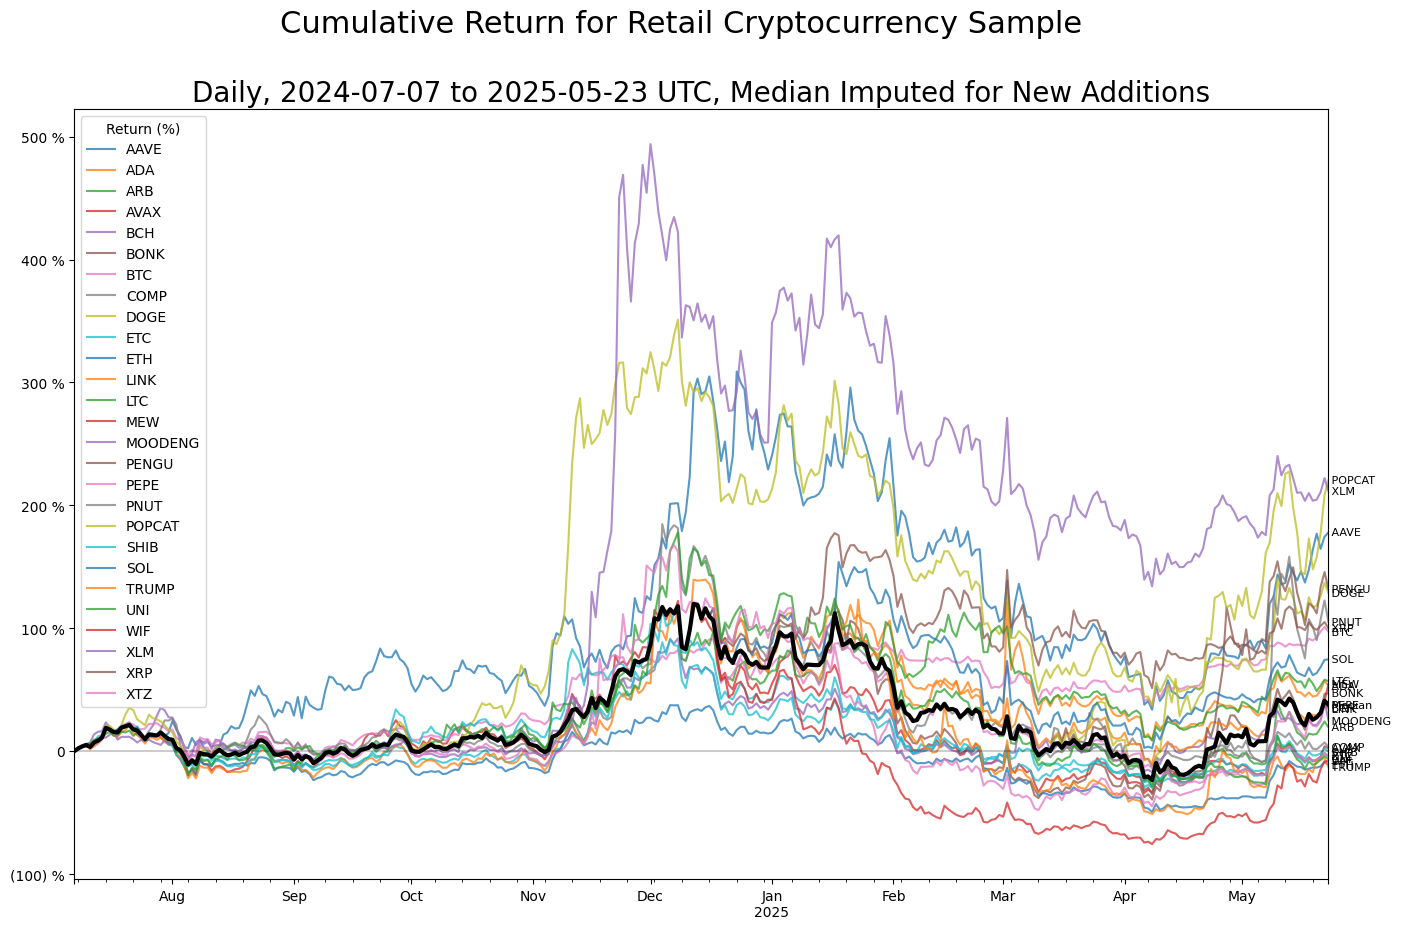

In [32]:
factor=(one+data/hundred)

for k,v in sorted(zip((s:=factor.apply(lambda x:x.first_valid_index()-1)).values,s.index),key=lambda x:x[0]):
    factor.loc[k,v]=m if not np.isnan(m:=factor.cumprod().loc[k].median()) else one

factor=factor.cumprod()*hundred-hundred
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
factor.plot(ax=plot,alpha=0.75)
factor['Median']=factor.median(axis=1)
factor['Median'].plot(ax=plot,color='black',linewidth=3)

plot.yaxis.set_major_formatter(PercentLabels(0))
plot.axhline(color='black',alpha=0.2)
plot.set_xlabel(None)
figure.suptitle(title:='Cumulative Return for Retail Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC, Median Imputed for New Additions" % (factor.index[0],factor.index[-1]),fontsize=20)

for c in factor:
    plot.text(x:=factor.index[-1],y:=factor.loc[x,c]," "+c,fontsize=8,ha='left',va='center')

figure.savefig(filename:=title+(filetype:='.png'),dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

14:05:08 Excluding recently listed coins from analysis... MEW, MOODENG
14:05:09 Rank Correlation for 'Useful' Coins: SignificanceResult(statistic=np.float64(-0.5794117647058823), pvalue=np.float64(0.018662529417711946))


,Median,Mean,Std.Dev.,Sample,Std.Err.,t Statistic,p Value,Significance,Symbol Rank,Meme Coin
Return (%),,,,,,,,,,
AAVE,0.479099,0.800456,5.288634,71,0.627645,1.275332,0.202192,,1,0.0
ADA,0.105852,0.244924,4.171490,71,0.495065,0.494731,0.620790,,2,0.0
ARB,0.433240,0.410852,5.713518,71,0.678070,0.605914,0.544572,,3,0.0
AVAX,0.226491,0.531453,4.859229,71,0.576684,0.921567,0.356754,,4,0.0
BCH,0.159456,0.500055,4.092687,71,0.485713,1.029529,0.303231,,5,0.0
BTC,0.223019,0.455458,2.434733,71,0.288950,1.576256,0.114967,,7,0.0
COMP,-0.179553,0.203382,4.105967,71,0.487289,0.417375,0.676404,,8,0.0
ETC,-0.147294,0.159757,3.628900,71,0.430671,0.370950,0.710675,,10,0.0
ETH,-0.010264,0.564125,4.665671,71,0.553713,1.018803,0.308297,,11,0.0


14:05:09
OLS Regression for 'Useful' Coins
                            OLS Regression Results                            
Dep. Variable:                   Mean   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     6.938
Date:                Fri, 23 May 2025   Prob (F-statistic):             0.0196
Time:                        14:05:09   Log-Likelihood:                 5.7012
No. Observations:                  16   AIC:                            -7.402
Df Residuals:                      14   BIC:                            -5.857
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const  

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


,Median,Mean,Std.Dev.,Sample,Std.Err.,t Statistic,p Value,Significance,Symbol Rank,Meme Coin,Linear Model
Return (%),,,,,,,,,,,
AAVE,0.479099,0.800456,5.288634,71,0.627645,1.275332,0.202192,,1,0.0,0.551871
ADA,0.105852,0.244924,4.171490,71,0.495065,0.494731,0.620790,,2,0.0,0.525995
ARB,0.433240,0.410852,5.713518,71,0.678070,0.605914,0.544572,,3,0.0,0.500120
AVAX,0.226491,0.531453,4.859229,71,0.576684,0.921567,0.356754,,4,0.0,0.474245
BCH,0.159456,0.500055,4.092687,71,0.485713,1.029529,0.303231,,5,0.0,0.448370
BONK,0.243902,1.423750,7.960960,71,0.944792,1.506945,0.131825,,6,1.0,NaN
BTC,0.223019,0.455458,2.434733,71,0.288950,1.576256,0.114967,,7,0.0,0.422495
COMP,-0.179553,0.203382,4.105967,71,0.487289,0.417375,0.676404,,8,0.0,0.396620
DOGE,0.022926,0.637587,5.242312,71,0.622148,1.024816,0.305450,,9,1.0,NaN


14:05:10 Wrote figure to 'Mean Return for Retail Cryptocurrency Sample.png'.


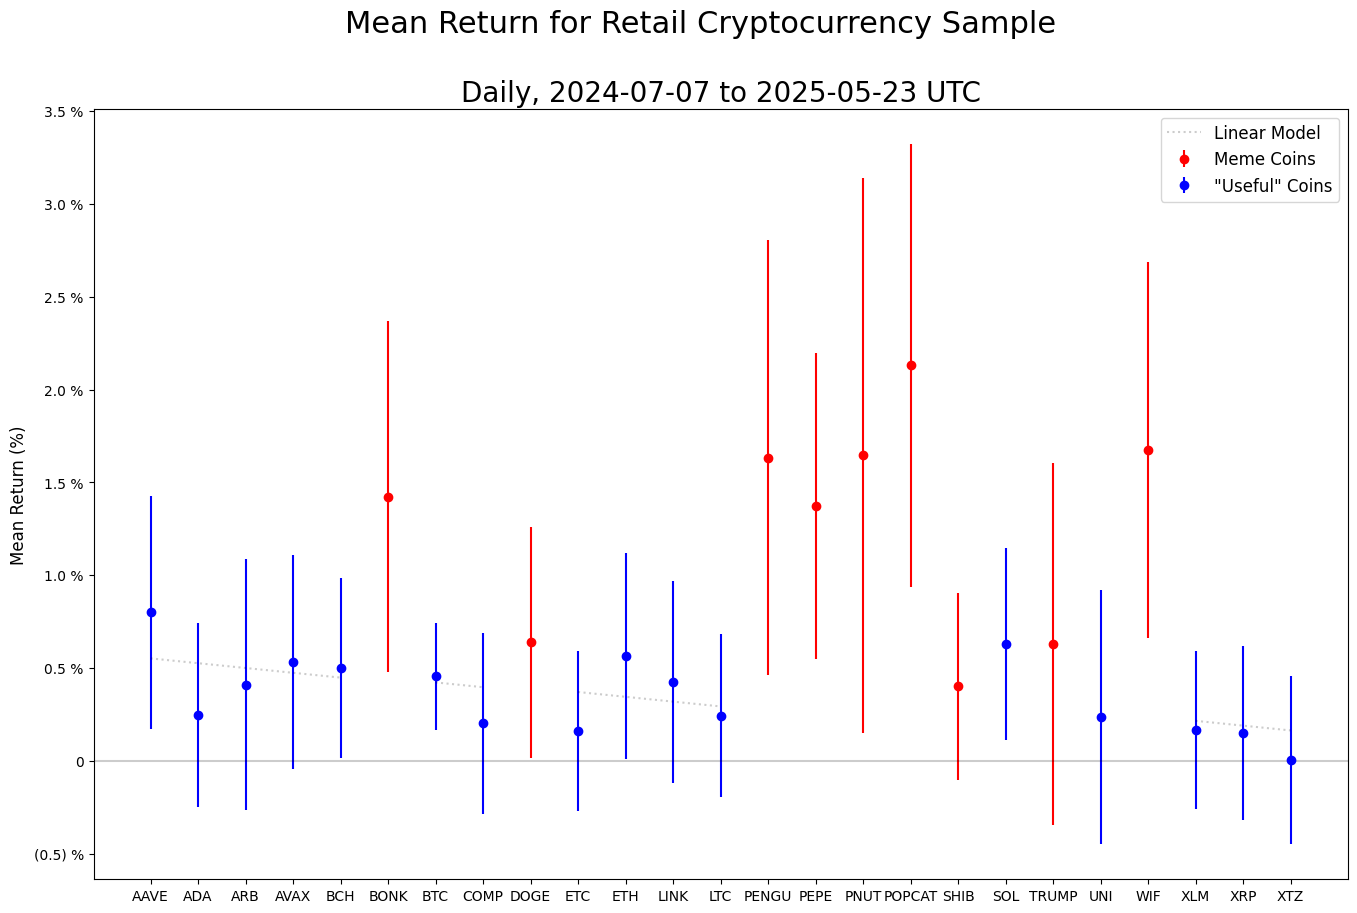

In [35]:
from scipy.stats import spearmanr,norm
from statsmodels.api import OLS
from statsmodels.tools import add_constant

nprint("Excluding recently listed coins from analysis: %s..." % ", ".join(c:=(data.index[-1]-data.apply(lambda x:x.first_valid_index(),axis=0)).apply(lambda x:np.nan if x.n>60 else x.n).dropna().index))

report=pd.DataFrame({ # drop recently listed coins and then drop na's
    "Median":(design:=data.drop(columns=c).dropna(axis=0).sort_index()).median(), # sort index not needed, but let's do it anyway
    "Mean":(m:=design.mean()),
    "Std.Dev.":design.std(),
    "Sample":design.count(),
    "Std.Err.":(e:=design.std()/np.sqrt(design.count())),
    "t Statistic":(z:=m/e),
    "p Value":(p:=z.apply(lambda x:two*min([norm.cdf(x),norm.sf(x)]))),
    "Significance":p.apply(lambda x:"***" if x<=0.001 else "**" if x<=0.01 else "*" if x<0.05 else ""),
    "Symbol Rank":list(range(1,m.index.shape[0]+1)),
    "Meme Coin":[one if t in "BONK,DOGE,PENGU,PEPE,PNUT,POPCAT,SHIB,TRUMP,WIF,MEW,MOODENG" else zero for t in m.index]
})

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(x:=report.index,y:=report["Mean"],alpha=0,label=None)
plot.errorbar(x:=report[report["Meme Coin"]==one].index,y:=report.loc[x,"Mean"],ye:=report.loc[x,"Std.Err."],fmt='o',color="Red",label='Meme Coins')
plot.errorbar(x:=report[report["Meme Coin"]==zero].index,y:=report.loc[x,"Mean"],ye:=report.loc[x,"Std.Err."],fmt='o',color="Blue",label='"Useful" Coins')
nprint("Rank Correlation for 'Useful' Coins:",spearmanr(x,y))

design=report.loc[u:=x];display(design)
design["Symbol Rank"]=list(range(1,design.index.shape[0]+1))
fit=OLS(y:=design["Mean"],add_constant(x:=design["Symbol Rank"])).fit()
nprint("OLS Regression for 'Useful' Coins",fit.summary(),sep="\n")
report.loc[design.index,"Linear Model"]=fit.predict()
display(report)

plot.plot(x:=report.index,y:=report["Linear Model"],':',color='black',alpha=0.2,label="Linear Model")
plot.axhline(color='black',alpha=0.2)
plot.set_xlabel(None)
figure.suptitle(title:='Mean Return for Retail Cryptocurrency Sample',fontsize=22)
plot.set_title(subtitle:="Daily, %s to %s UTC" % (data[u].index[0],data[u].index[-1]),fontsize=20)
plot.yaxis.set_major_formatter(PercentLabels(1))
plot.set_ylabel("Mean Return (%)",fontsize=12)
plot.legend(fontsize=12)
figure.savefig(filename:=title+'.png',dpi=300,bbox_inches='tight')
nprint("Wrote figure to '%s'." % filename)

In [9]:
from warnings import catch_warnings,simplefilter

design=data[report[report["Meme Coin"]==zero].index].dropna()
results=pd.DataFrame(index=design.columns)
nprint("Fitting AR(1)-AGARCH(1,1) Model with GED Innovations for %s to %s UTC..." % (design.index[0],design.index[-1]))

for ticker in tqdm(design.columns):
    model=ARX(design[ticker],lags=[1])
    model.volatility = GARCH2(1,0,1)
    model.distribution = GeneralizedError2()

    with catch_warnings():
        simplefilter("ignore")
        ged_model=model.fit(update_freq=0,disp='Off',options={'maxiter':1000})

        if ged_model.convergence_flag==0:
            for field in "Estimate","Std.Err.":
                results.loc[ticker,"Drift,%s" % field]=(g:=ged_model.params if field=="Estimate" else ged_model.std_err)["Const"]
                results.loc[ticker,"Return,%s" % field]=g[ticker+"[1]"]
                results.loc[ticker,"C,%s" % field]=g["omega"]
                results.loc[ticker,"A,%s" % field]=g["alpha[1]"]
                results.loc[ticker,"B,%s" % field]=g["beta[1]"]
                results.loc[ticker,"nu,%s" % field]=g["nu"]

            results.loc[ticker,"variance,Estimate"]=results.loc[ticker,"C,Estimate"]/(one-results.loc[ticker,"B,Estimate"]-results.loc[ticker,"B,Estimate"])

results.columns=pd.MultiIndex.from_tuples(list(map(lambda x:tuple(x.split(",")),results.columns)))
spearman=pd.DataFrame(index=(lambda x:dict.fromkeys(x).keys())(results.columns.get_level_values(0)))
results.sort_index(axis=1,inplace=True)
display(results)

nprint("Analysis of correlation with ticker ranks...")

for estimator in spearman.index:
    spearman.loc[estimator,"Rank Correlation"]=(R:=spearmanr(x:=results.index,y:=results.xs("Estimate",axis=1,level=1)[estimator])).statistic
    spearman.loc[estimator,"Sample"]=(n:=len(x))
    spearman.loc[estimator,"t Statistic"]=R.statistic*((n-two)/(one-R.statistic**two))**half
    spearman.loc[estimator,"p Value"]=R.pvalue

spearman["Significance"]=spearman["p Value"].apply(lambda x:"***" if x<=0.001 else "**" if x<=0.01 else "*" if x<0.05 else "")
display(spearman.sort_values("Rank Correlation",ascending=False))

nprint("Most significant result:",(p:=spearman["p Value"].min()),"by chance",one-(one-p)**(n:=spearman.shape[0]),"in a sample of",n)

13:48:44 Fitting AR(1)-AGARCH(1,1) Model with GED Innovations for 2025-03-05 to 2025-05-23 UTC...


  0%|          | 0/16 [00:00<?, ?it/s]

A                           B                        C  \
            Estimate      Std.Err.      Estimate      Std.Err.   Estimate   
Return (%)                                                                  
AAVE        0.003499  1.196546e-01  4.911055e-01  3.855651e+00  13.406078   
ADA         0.102597  1.294353e-01  6.445323e-01  1.793269e-01   4.758491   
ARB         0.117222  1.002016e-01  6.248876e-01  8.766714e-02   8.146596   
AVAX       -0.171559  2.375241e-09  1.136194e+00  1.562261e-08   1.590744   
BCH         0.052951  1.090459e-01  6.411197e-01  9.018065e-02   5.500779   
BTC        -0.126918  2.818769e-08  1.102725e+00  3.649886e-08   0.259842   
COMP        0.045968  8.694909e-02  7.437140e-01  1.063578e-01   3.622329   
ETC         0.106586  7.987759e-02  2.320994e-01  3.878716e-01   9.781236   
ETH         0.495636  6.779333e-01 -1.339407e-14  7.541299e-01  15.731527   
LINK       -0.143754  6.870641e-08  1.118107e+00  5.248067e-07   0.850751   
LTC         0.045309  9.957567e-02  6.079231e-01  1.340451e-01   4.850602   
SOL         0.053782  1.074996e-01  8.140486e-01  1.555624e-01   2.493494   
UNI         0.207372  2.908953e-01  3.941981e-01  9.867756e-01  15.548428   
XLM         0.085149  1.089138e-01  5.442195e-01  1.037516e-01   5.054023   
XRP         0.176994  1.774170e-01  6.070012e-01  1.280769e-01   4.056673   
XTZ         0.069844  9.921253e-02  5.505068e-01  3.359386e-01   5.907686   

                             Drift              Return                  nu  \
                Std.Err.  Estimate  Std.Err.  Estimate  Std.Err.  Estimate   
Return (%)                                                                   
AAVE        1.084883e+02  0.053473  0.890954 -0.143933  0.101754  1.246543   
ADA         3.098336e+00 -0.280148  0.002513 -0.196690  0.001300  1.082375   
ARB         4.255260e+00  0.402867  0.000210  0.035059  0.000038  0.973511   
AVAX        1.946566e-10 -0.416551  0.000003  0.023946  0.000373  2.083154   
BCH         2.161573e+00  0.067248  0.001300 -0.101793  0.000546  1.083842   
BTC         2.788740e-04 -0.039649  0.002782 -0.052232  0.000842  1.640824   
COMP        2.077154e+00 -0.190780  0.053489 -0.055487  0.167748  1.342127   
ETC         5.904712e+00 -0.304021  0.010156 -0.201303  0.005725  0.998433   
ETH         1.380516e+01  0.130633  0.000232 -0.255601  0.000252  0.638428   
LINK        2.386357e-08 -0.033466  0.028408  0.029315  0.004680  2.020994   
LTC         2.500605e+00  0.034633  0.009936 -0.189290  0.007608  1.090729   
SOL         2.773585e+00  0.112237  0.409178 -0.056977  0.111246  1.144269   
UNI         3.155557e+01 -0.616628  0.007631 -0.164775  0.001688  0.689122   
XLM         2.424050e+00 -0.078961  0.464985 -0.112240  0.159791  1.426151   
XRP         2.366392e+00 -0.121608  0.000025  0.068549  0.000036  0.888208   
XTZ         5.685942e+00  0.315999  0.002680  0.000932  0.005615  1.098115   

                        variance  
            Std.Err.    Estimate  
Return (%)                        
AAVE        0.317027  753.616812  
ADA         0.206936  -16.461690  
ARB         0.211265  -32.615719  
AVAX        0.000127   -1.250204  
BCH         0.251828  -19.489769  
BTC         0.001120   -0.215556  
COMP        0.281240   -7.431516  
ETC         0.237591   18.255347  
ETH         0.141440   15.731527  
LINK        0.008767   -0.688190  
LTC         0.233642  -22.472489  
SOL         0.245616   -3.969917  
UNI         0.189409   73.478943  
XLM         0.277352  -57.146933  
XRP         0.200237  -18.956197  
XTZ         0.215884  -58.484073

13:48:47 Analysis of correlation with ticker ranks...


,Rank Correlation,Sample,t Statistic,p Value,Significance
A,0.317647,16.0,1.253444,0.230573,
Return,0.120588,16.0,0.454517,0.656425,
Drift,0.026471,16.0,0.099079,0.922481,
C,0.005882,16.0,0.022010,0.982751,
nu,-0.147059,16.0,-0.556292,0.586793,
B,-0.270588,16.0,-1.051681,0.310761,
variance,-0.305882,16.0,-1.202126,0.249254,


13:48:47 Most significant result: 0.23057346362184541 by chance 0.8403495588964156 in a sample of 7
